## Assignment 1
### Name: Bismay Parija
### Roll Number: 20CS30067

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston_data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
boston_target = raw_df.values[1::2, 2]


In [3]:
# Normalize features using mean-variance normalization
scaler = StandardScaler()
boston_data_normalized = scaler.fit_transform(boston_data)


In [4]:
# Convert to tensors
#X = torch.tensor(boston_data, dtype=torch.float32)
X = torch.tensor(boston_data_normalized, dtype=torch.float32)
# Reshape to (n_samples, 1)
y = torch.tensor(boston_target, dtype=torch.float32).view(-1, 1)
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [5]:
# Define the Model
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear1 = nn.Linear(X_train.shape[1], 16)
        self.linear2 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x


In [6]:
# Training Module
def train_model(model, optimizer, criterion, num_epochs=100, print_every=10):
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test)
            test_losses.append(test_loss.item())

        if (epoch + 1) % print_every == 0:
            print(
                f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    return train_losses, test_losses


In [7]:
# Initialize model, optimizer, and criterion
model = RegressionModel()
# optimizer = optim.SGD(model.parameters(), lr=0.001) # SGD optimizer
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.1, nesterov=True) # Nesterov momentum optimizer
optimizer = optim.Adadelta(model.parameters(), lr=0.001)  # Adadelta optimizer
criterion = nn.MSELoss()

# Train the model
num_epochs = 50000
print_every = 5000
train_losses, test_losses = train_model(
    model, optimizer, criterion, num_epochs, print_every)


Epoch [5000/50000], Train Loss: 331.4633, Test Loss: 290.8989
Epoch [10000/50000], Train Loss: 27.0302, Test Loss: 27.9716
Epoch [15000/50000], Train Loss: 16.7296, Test Loss: 19.5375
Epoch [20000/50000], Train Loss: 10.5890, Test Loss: 13.4755
Epoch [25000/50000], Train Loss: 9.1939, Test Loss: 11.8909
Epoch [30000/50000], Train Loss: 8.5532, Test Loss: 11.1758
Epoch [35000/50000], Train Loss: 8.0643, Test Loss: 10.9067
Epoch [40000/50000], Train Loss: 7.7102, Test Loss: 10.7015
Epoch [45000/50000], Train Loss: 7.3116, Test Loss: 10.8077
Epoch [50000/50000], Train Loss: 7.0269, Test Loss: 10.9138


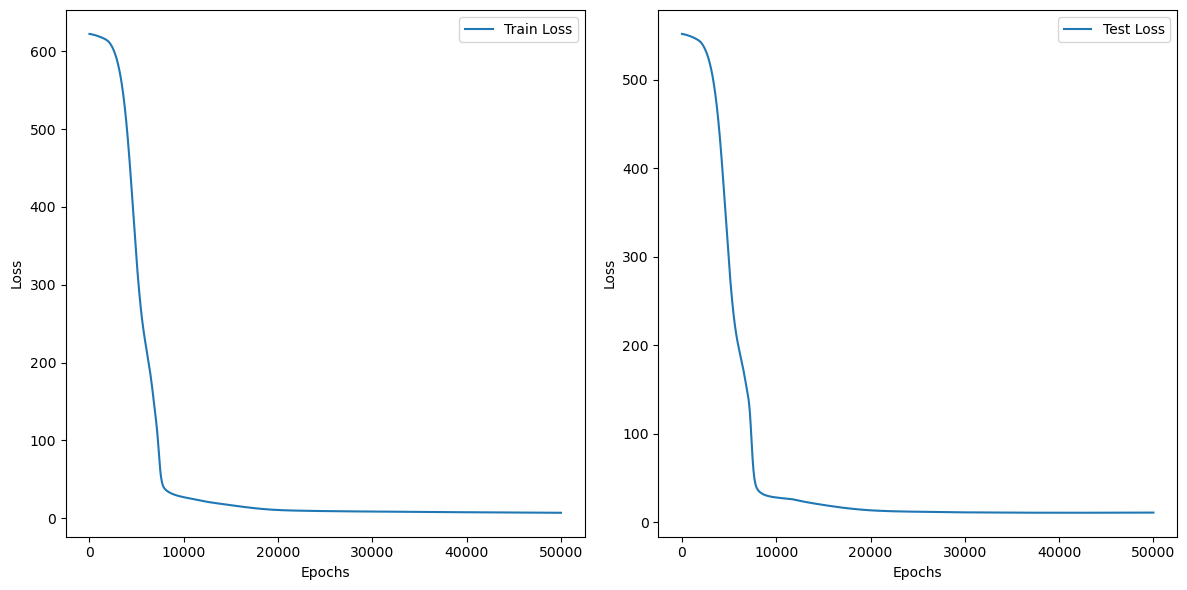

In [8]:
# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
